### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline # run if you're using colab

###Load data

In [9]:
data = pd.read_csv('/Datasets/weather_data.csv')

In [ ]:
data.head()

### NaNs (Not a Number)

In [6]:
data.isna().sum()

time-stamp               0
temp                   144
pressure               144
humidity               144
clouds_all             144
rain_1h                144
weather_description    144
dtype: int64

In [7]:
data.dropna(inplace=True)

### Plotting Data

#### Numpy arrays

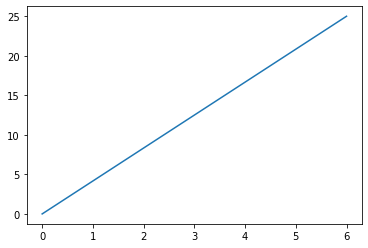

In [14]:
xpoints = np.array([0, 6])
ypoints = np.array([0, 25])

plt.plot(xpoints, ypoints)
plt.show()

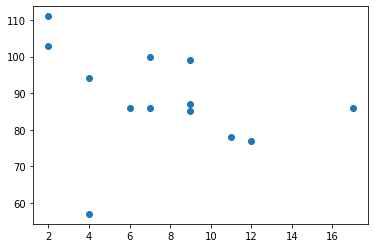

In [13]:
x = np.array([9,7,4,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,57,100,111,86,103,87,94,78,77,85,86])

plt.scatter(x, y)
plt.show()

####Plotting in pandas

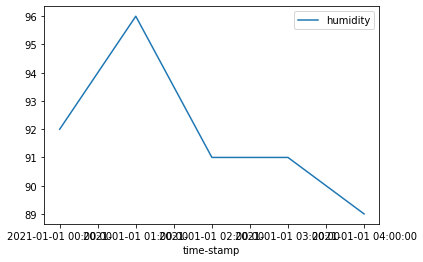

In [24]:
data.head().plot(x='time-stamp',y='humidity')

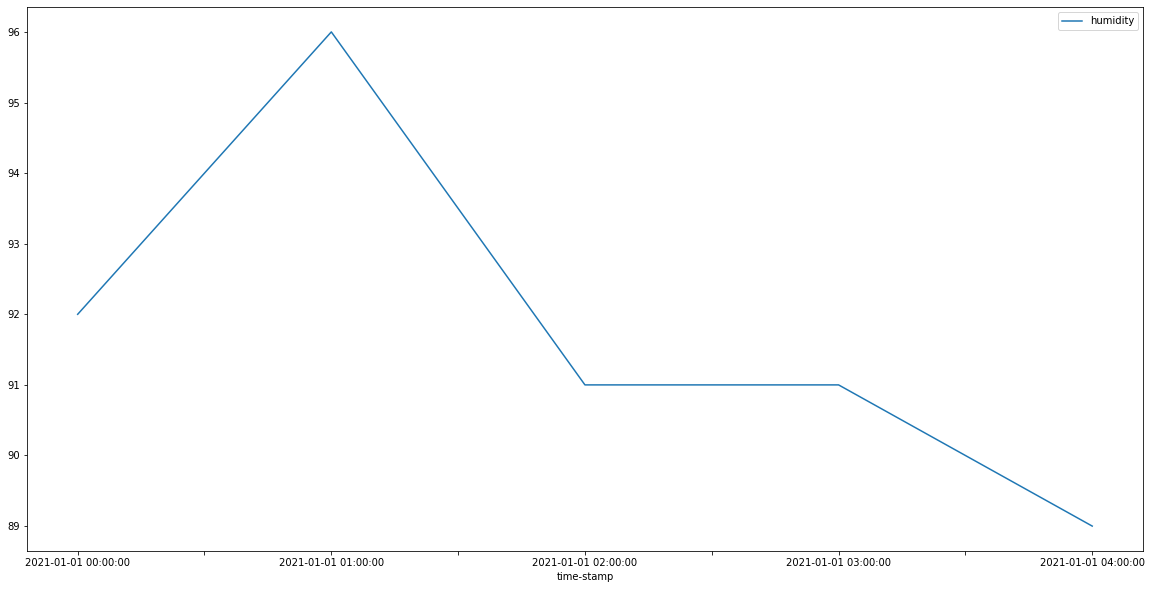

In [25]:
data.head().plot(x='time-stamp',y='humidity',figsize=(20,10))

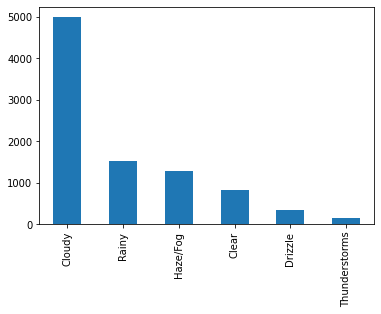

In [27]:
#Bar graph for weather condition
data['weather_description'].value_counts().plot(kind='bar')

#### QUIZ QUESTION: Do you think having more instances of one type matters?

#### Boxplot

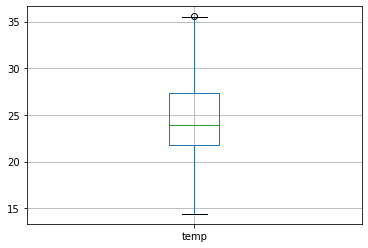

In [32]:
data.boxplot(column='temp')

### Outliers

In [10]:
data.describe()

,temp,pressure,humidity,clouds_all,rain_1h
count,9085.000000,9085.000000,9085.000000,9085.000000,9085.000000
mean,24.601478,996.378536,72.960925,47.865823,0.165389
std,3.761952,30.535715,21.310735,30.006911,0.597118
min,14.400000,661.000000,10.000000,0.000000,0.000000
25%,21.810000,983.000000,58.000000,20.000000,0.000000
50%,23.980000,1011.000000,78.000000,40.000000,0.000000
75%,27.310000,1014.000000,93.000000,75.000000,0.000000
max,35.580000,1021.000000,100.000000,150.000000,9.400000


In [11]:
data = data[data['clouds_all'].isin(range(101))]

In [12]:
data.describe()

,temp,pressure,humidity,clouds_all,rain_1h
count,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000
mean,24.793799,995.716676,71.777297,44.565360,0.158335
std,3.776971,30.568435,21.361350,27.816252,0.580509
min,14.400000,661.000000,10.000000,0.000000,0.000000
25%,22.020000,978.000000,57.000000,20.000000,0.000000
50%,24.350000,1011.000000,75.000000,40.000000,0.000000
75%,27.530000,1014.000000,91.000000,75.000000,0.000000
max,35.580000,1021.000000,100.000000,99.000000,9.400000


### Correlation

In [34]:
data.corr()

,temp,pressure,humidity,clouds_all,rain_1h
temp,1.000000,-0.570904,-0.792070,-0.271746,-0.020507
pressure,-0.570904,1.000000,0.484916,0.103486,0.008786
humidity,-0.792070,0.484916,1.000000,0.563551,0.131778
clouds_all,-0.271746,0.103486,0.563551,1.000000,0.193686
rain_1h,-0.020507,0.008786,0.131778,0.193686,1.000000


#### QUESTION: What features would you take to predict cloud cover?

### Encoding

#### Label Encoding

In [19]:
#Encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelencoder = LabelEncoder()
data['weather_description_labels'] = labelencoder.fit_transform(data['weather_description'])
data['weather_description_labels']

0        3
1        1
2        1
3        1
4        3
        ..
27781    5
27782    5
27783    5
27784    5
27785    5
Name: weather_description_labels, Length: 27786, dtype: int64

In [20]:
data

,temp,pressure,humidity,clouds_all,rain_1h,weather_description,weather_description_labels
0,19.430000,1015.000000,92.000000,40.0,0.000000,Haze/Fog,3
1,18.290000,1015.000000,96.000000,91.0,0.000000,Cloudy,1
2,18.830000,1013.000000,91.000000,20.0,0.000000,Cloudy,1
3,18.830000,1013.000000,91.000000,20.0,0.000000,Cloudy,1
4,18.330000,1014.000000,96.000000,20.0,0.000000,Haze/Fog,3
...,...,...,...,...,...,...,...
27781,24.143294,1014.750454,97.748639,75.0,0.322695,Thunderstorms,5
27782,22.405171,1013.172834,98.271664,90.0,0.827166,Thunderstorms,5
27783,28.238782,937.856760,71.713520,90.0,3.118687,Thunderstorms,5
27784,26.611200,1010.000000,76.064001,75.0,0.196840,Thunderstorms,5


In [22]:
dict(zip(labelencoder.classes_,range(len(labelencoder.classes_))))

{'Clear': 0,
 'Cloudy': 1,
 'Drizzle': 2,
 'Haze/Fog': 3,
 'Rainy': 4,
 'Thunderstorms': 5}

####One Hot Encoding

In [23]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data[['weather_description_labels']]).toarray())
data1 = data.join(enc_df)
data1

,temp,pressure,humidity,clouds_all,rain_1h,weather_description,weather_description_labels,0,1,2,3,4,5
0,19.430000,1015.000000,92.000000,40.0,0.000000,Haze/Fog,3,0.0,0.0,0.0,1.0,0.0,0.0
1,18.290000,1015.000000,96.000000,91.0,0.000000,Cloudy,1,0.0,1.0,0.0,0.0,0.0,0.0
2,18.830000,1013.000000,91.000000,20.0,0.000000,Cloudy,1,0.0,1.0,0.0,0.0,0.0,0.0
3,18.830000,1013.000000,91.000000,20.0,0.000000,Cloudy,1,0.0,1.0,0.0,0.0,0.0,0.0
4,18.330000,1014.000000,96.000000,20.0,0.000000,Haze/Fog,3,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27781,24.143294,1014.750454,97.748639,75.0,0.322695,Thunderstorms,5,0.0,0.0,0.0,0.0,0.0,1.0
27782,22.405171,1013.172834,98.271664,90.0,0.827166,Thunderstorms,5,0.0,0.0,0.0,0.0,0.0,1.0
27783,28.238782,937.856760,71.713520,90.0,3.118687,Thunderstorms,5,0.0,0.0,0.0,0.0,0.0,1.0
27784,26.611200,1010.000000,76.064001,75.0,0.196840,Thunderstorms,5,0.0,0.0,0.0,0.0,0.0,1.0


### SMOTE (Synthetic Minority Oversampling Technique)

In [17]:
data['weather_description'].value_counts()

Haze/Fog         4631
Cloudy           4631
Drizzle          4631
Clear            4631
Rainy            4631
Thunderstorms    4631
Name: weather_description, dtype: int64

In [16]:
#SMOTE
from imblearn.over_sampling import SMOTE

X = data.drop(['weather_description','time-stamp'], axis = 1)
y = data['weather_description']
smote = SMOTE()
X,y = smote.fit_resample(X,y)
data = X
data['weather_description'] = y

In [14]:
data['weather_description'].value_counts()

Cloudy           4631
Rainy            1340
Haze/Fog         1276
Clear             817
Drizzle           334
Thunderstorms     147
Name: weather_description, dtype: int64

###Test Train Validation Split

In [24]:
from sklearn.model_selection import train_test_split

X = data.drop('weather_description',axis = 1)
y = data['weather_description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

#Split train/test data again to get validation data

### Check the shape of the data

In [25]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (22228, 6)
Shape of X_test: (5558, 6)
Shape of y_train: (22228,)
Shape of y_test: (5558,)
